# ws 11 mask

In [1]:
!pip install simple_image_download

INFO: pip is looking at multiple versions of simple-image-download to determine which version is compatible with other requirements. This could take a while.


In [2]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download

lst = ['human face','face']

for rep in lst:
    response().download(rep, 30)

## YOLO

In [3]:
!nvidia-smi

Wed Oct 23 16:14:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch

print(f"Setup complete. Using torch {torch.__version__}")
print(f"{torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}")

Setup complete. Using torch 2.4.1+cu121
Tesla T4


In [5]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.4.1+cu121 (Tesla T4)


In [6]:
# upload then unzip
!unzip "/content/mask_face.zip" -d "/content/datasets" #

Archive:  /content/mask_face.zip
   creating: /content/datasets/mask_face/
   creating: /content/datasets/mask_face/images/
   creating: /content/datasets/mask_face/images/train/
  inflating: /content/datasets/mask_face/images/train/mask.jpg  
   creating: /content/datasets/mask_face/labels/
   creating: /content/datasets/mask_face/labels/train/
  inflating: /content/datasets/mask_face/labels/train/mask.txt  
  inflating: /content/datasets/mask_face/obj.data  
  inflating: /content/datasets/mask_face/obj.names  
  inflating: /content/datasets/mask_face/train.txt  


In [14]:
%cd /content/yolov5/data
%pwd

/content/yolov5/data


'/content/yolov5/data'

In [15]:
from google.colab import files
uploaded = files.upload()

Saving cocomask.yaml to cocomask.yaml


In [16]:
%cd /content/yolov5/data
%pwd

/content/yolov5/data


'/content/yolov5/data'

In [17]:
%ls /content/yolov5/data/cocom*

/content/yolov5/data/cocomask.yaml


In [18]:
%cd ..

/content/yolov5


### Train

In [21]:
!python train.py --data cocomask.yaml --cfg yolov5s.yaml  --batch-size 32 --epochs 10 --img 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-23 16:21:55.655838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 16:21:55.688829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 16:21:55.699043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [28]:
!python train.py --data cocomask.yaml --cfg yolov5s.yaml --batch-size 32 --epochs 10 --img-size 640 --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-23 16:33:58.450424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 16:33:58.470330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 16:33:58.477779: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

### Predict

In [36]:
%ls yolov5s.pt

yolov5s.pt


In [37]:
!python detect.py --weights yolov5s.pt --img 420 --conf 0.4 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[420, 420], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [420, 420] must be multiple of max stride 32, updating to [448, 448]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/data/images/bus.jpg: 448x352 3 persons, 1 bus, 28.1ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 256x448 2 persons, 1 tie, 42.4ms
Speed: 0.3ms pre-process, 35.2ms inference, 

In [38]:
%cd /content/yolov5
%pwd
%ls

/content/yolov5
benchmarks.py  CONTRIBUTING.md  hubconf.py   __pycache__/     requirements.txt  tutorial.ipynb
CITATION.cff   data/            images.jfif  pyproject.toml   runs/             utils/
classify/      detect.py        LICENSE      README.md        segment/          val.py
cocomask.yaml  export.py        models/      README.zh-CN.md  train.py          yolov5s.pt


In [47]:
from google.colab import files
uploaded = files.upload()

Saving mask1.jpg to mask1.jpg


In [48]:
%ls *.pt

yolov5s.pt


In [55]:
!python detect.py --weights yolov5s.pt --conf 0.2 --source mask1.jpg #

detect: weights=['yolov5s.pt'], source=mask1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/mask1.jpg: 640x640 1 person, 12.2ms
Speed: 0.6ms pre-process, 12.2ms inference, 628.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp13


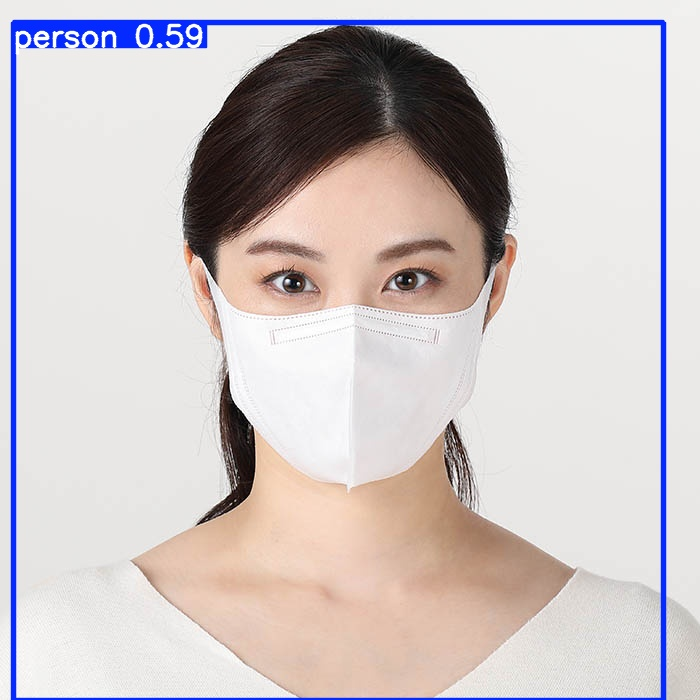

In [60]:
from IPython.display import Image
Image(filename='runs/detect/exp13/mask1.jpg')

In [61]:
%pwd

'/content/yolov5'

In [64]:
from google.colab import files
uploaded = files.upload()

Saving mask12.jpg to mask12.jpg


In [65]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.5 --source mask12.jpg

detect: weights=['yolov5s.pt'], source=mask12.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/mask12.jpg: 640x640 1 person, 12.2ms
Speed: 0.6ms pre-process, 12.2ms inference, 732.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp15


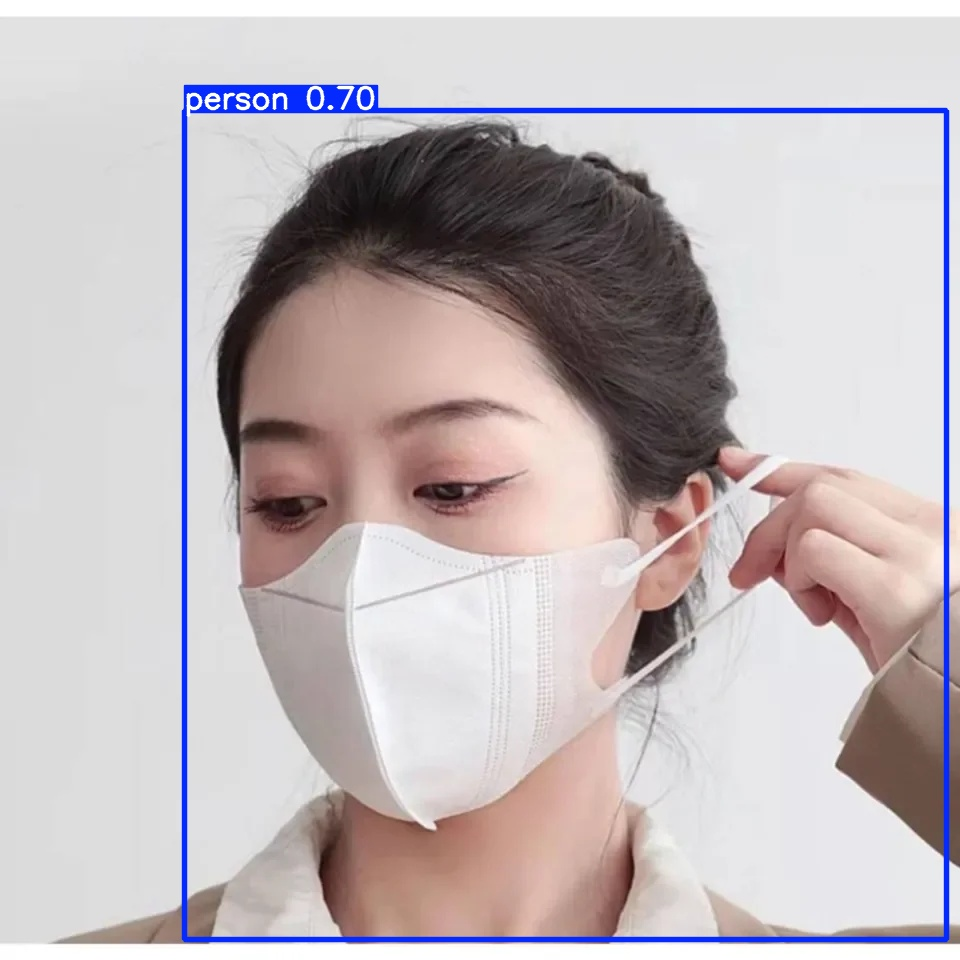

In [66]:
from IPython.display import Image
Image(filename='runs/detect/exp15/mask12.jpg')